In [10]:
!CUDA_VISIBLE_DEVICES=4,5 torchrun --nproc_per_node=2 --master_port=29501 module6/train.py --backbone_lr=1e-5


W0221 15:59:13.783000 3996270 site-packages/torch/distributed/run.py:793] 
W0221 15:59:13.783000 3996270 site-packages/torch/distributed/run.py:793] *****************************************
W0221 15:59:13.783000 3996270 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0221 15:59:13.783000 3996270 site-packages/torch/distributed/run.py:793] *****************************************
0
1
Epoch: 1 Train loss: 16.587 Aux train loss: 10.004 Val loss: 7.199 Aux val loss: 4.150 Train MAE: 74.164 Val MAE: 87.292 Epoch time: 183.008 seconds best
Epoch: 2 Train loss: 16.938 Aux train loss: 10.146 Val loss: 6.783 Aux val loss: 4.069 Train MAE: 69.304 Val MAE: 46.918 Epoch time: 184.391 seconds best
Epoch: 3 Train loss: 16.685 Aux train loss: 10.006 Val loss: 6.732 Aux val loss: 4.066 Train MAE:

In [11]:
!CUDA_VISIBLE_DEVICES=7 torchrun --nproc_per_node=1 module6/evaluate.py

/home/renaldy_fredyan/PhDResearch/ELS/module6/evaluate.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(os.path.join(args.model_path, f'{args.mod


5 Best MAE:
Train MAE:
Epoch     MAE            
-------------------------
196       22.1145        
173       22.2931        
199       22.6969        
189       23.2131        
194       23.4490        

Validation MAE:
Epoch     MAE            
-------------------------
185       21.1110        
197       21.2777        
196       21.6372        
175       22.1514        
165       22.3437        


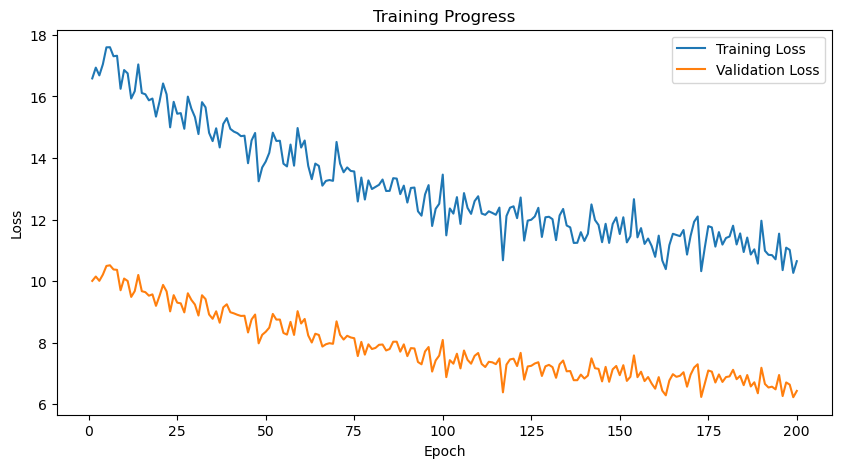

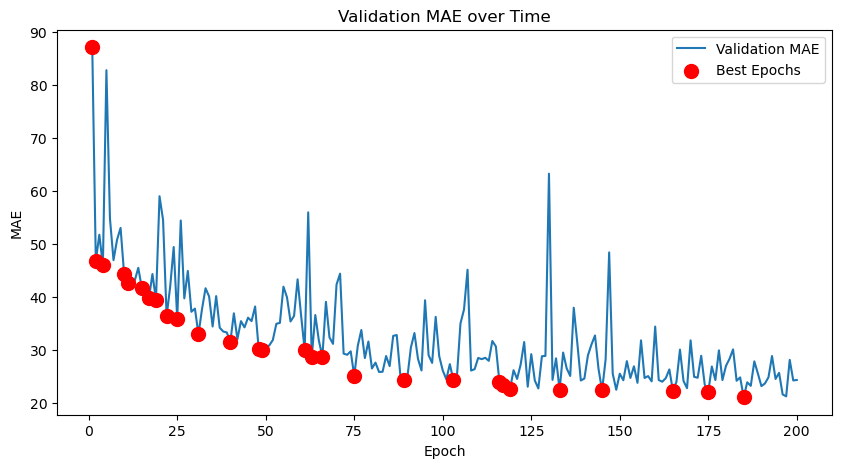

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca CSV
df = pd.read_csv('checkpoints/efficient_low_2.csv')

df['Validation MAE'] = df['Validation MAE'] / 8

best_train = df.nsmallest(5, 'Train MAE')[['Epoch', 'Train MAE']]
best_val = df.nsmallest(5, 'Validation MAE')[['Epoch', 'Validation MAE']]


# Print tabel
print("\n5 Best MAE:")
print("=" * 50)
print("Train MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_train.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Train MAE']:<15.4f}")

print("\nValidation MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_val.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Validation MAE']:<15.4f}")
print("=" * 50)

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Training Loss'], label='Training Loss')
plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Progress')
plt.show()

# Plot MAE dengan best points
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Validation MAE'], label='Validation MAE')

# Tambahkan titik merah untuk Best Epochs
best_epochs = df[df['Best Epoch'] == 'Yes']
plt.scatter(best_epochs['Epoch'], best_epochs['Validation MAE'], 
           color='red', s=100, label='Best Epochs', zorder=5)

plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Validation MAE over Time')
plt.show()

In [1]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 --master_port=29501 module6/train.py --backbone_lr=0 --model_name=efficient_low_2_freeze


W0223 11:04:19.765000 310895 site-packages/torch/distributed/run.py:793] 
W0223 11:04:19.765000 310895 site-packages/torch/distributed/run.py:793] *****************************************
W0223 11:04:19.765000 310895 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0223 11:04:19.765000 310895 site-packages/torch/distributed/run.py:793] *****************************************
3
2
1
0
Epoch: 1 Train loss: 9.395 Aux train loss: 5.655 Val loss: 4.170 Aux val loss: 2.479 Train MAE: 76.461 Val MAE: 72.350 Epoch time: 89.415 seconds best
Epoch: 2 Train loss: 9.358 Aux train loss: 5.608 Val loss: 4.133 Aux val loss: 2.468 Train MAE: 68.583 Val MAE: 69.259 Epoch time: 93.313 seconds best
Epoch: 3 Train loss: 9.813 Aux train loss: 5.886 Val loss: 4.091 Aux val loss: 2.472 Train MAE: 68.575 

In [3]:
!CUDA_VISIBLE_DEVICES=7 torchrun --nproc_per_node=1 module6/evaluate.py --backbone_lr=0 --model_name=efficient_low_2_freeze

/home/renaldy_fredyan/PhDResearch/ELS/module6/evaluate.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(os.path.join(args.model_path, f'{args.mod


5 Best MAE:
Train MAE:
Epoch     MAE            
-------------------------
192       32.0241        
199       32.7996        
154       32.9099        
167       33.2126        
160       33.2576        

Validation MAE:
Epoch     MAE            
-------------------------
177       3.6783         
190       3.7041         
180       3.7271         
144       3.7792         
109       3.8611         


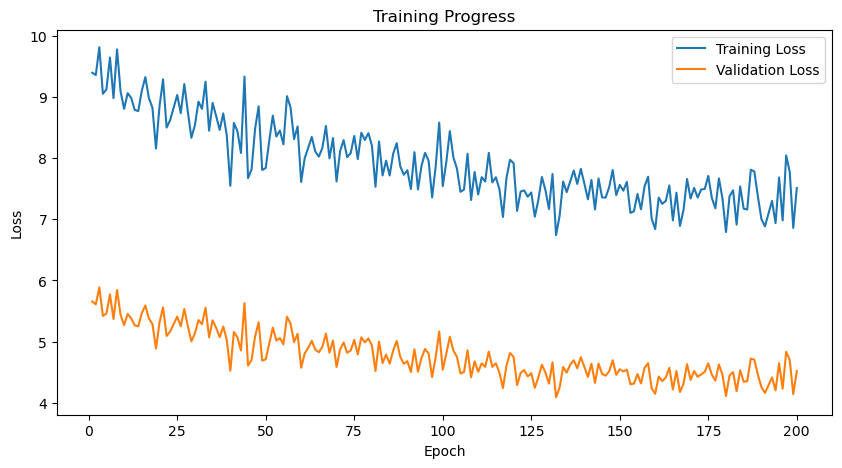

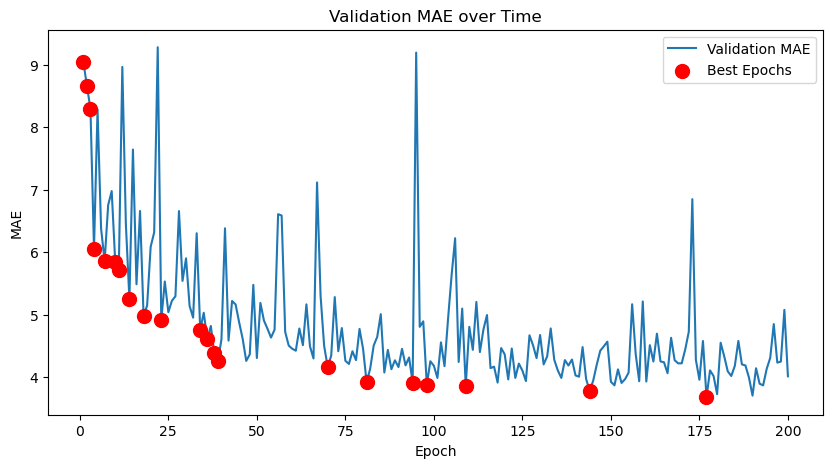

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca CSV
df = pd.read_csv('checkpoints/efficient_low_2_freeze.csv')

df['Validation MAE'] = df['Validation MAE'] / 8

best_train = df.nsmallest(5, 'Train MAE')[['Epoch', 'Train MAE']]
best_val = df.nsmallest(5, 'Validation MAE')[['Epoch', 'Validation MAE']]


# Print tabel
print("\n5 Best MAE:")
print("=" * 50)
print("Train MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_train.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Train MAE']:<15.4f}")

print("\nValidation MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_val.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Validation MAE']:<15.4f}")
print("=" * 50)

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Training Loss'], label='Training Loss')
plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Progress')
plt.show()

# Plot MAE dengan best points
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Validation MAE'], label='Validation MAE')

# Tambahkan titik merah untuk Best Epochs
best_epochs = df[df['Best Epoch'] == 'Yes']
plt.scatter(best_epochs['Epoch'], best_epochs['Validation MAE'], 
           color='red', s=100, label='Best Epochs', zorder=5)

plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Validation MAE over Time')
plt.show()

In [1]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 --master_port=29501 module6/train.py --backbone_lr=1e-5 \
--model_name=efficient_unfreeze_pre_norm --pre_norm


W0224 10:25:12.078000 782946 site-packages/torch/distributed/run.py:793] 
W0224 10:25:12.078000 782946 site-packages/torch/distributed/run.py:793] *****************************************
W0224 10:25:12.078000 782946 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0224 10:25:12.078000 782946 site-packages/torch/distributed/run.py:793] *****************************************
3
0
2
1
Epoch: 1 Train loss: 9.500 Aux train loss: 5.713 Val loss: 4.184 Aux val loss: 2.508 Train MAE: 81.026 Val MAE: 66.889 Epoch time: 108.474 seconds best
Epoch: 2 Train loss: 9.416 Aux train loss: 5.687 Val loss: 4.292 Aux val loss: 2.509 Train MAE: 71.462 Val MAE: 101.370 Epoch time: 109.537 seconds 
Epoch: 3 Train loss: 9.830 Aux train loss: 5.877 Val loss: 4.052 Aux val loss: 2.431 Train MAE: 68.773 V

In [2]:
!CUDA_VISIBLE_DEVICES=7 torchrun --nproc_per_node=1 --master_port=29501 module6/evaluate.py --backbone_lr=1e-5 \
--model_name=efficient_unfreeze_pre_norm --pre_norm


/home/renaldy_fredyan/PhDResearch/ELS/module6/evaluate.py:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(os.path.join(args.model_path, f'{args.mod


5 Best MAE:
Train MAE:
Epoch     MAE            
-------------------------
192       25.4159        
190       25.5966        
196       26.1166        
191       26.5514        
175       26.8460        

Validation MAE:
Epoch     MAE            
-------------------------
150       2.9331         
200       3.0093         
168       3.0834         
165       3.0982         
194       3.1090         


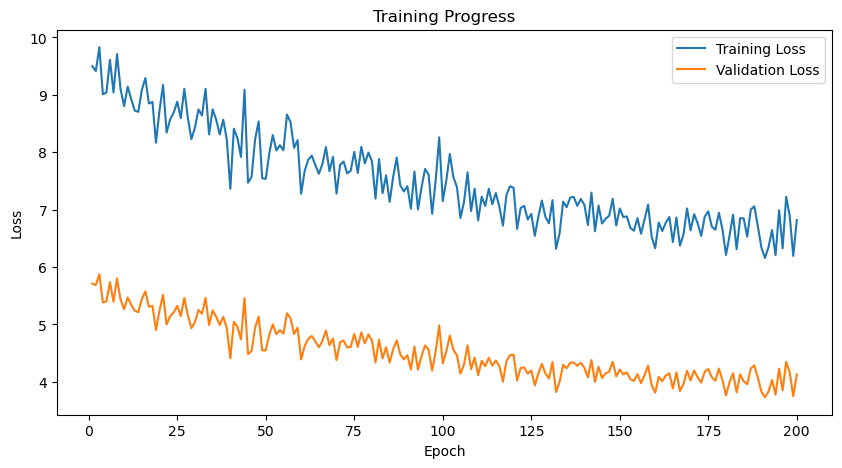

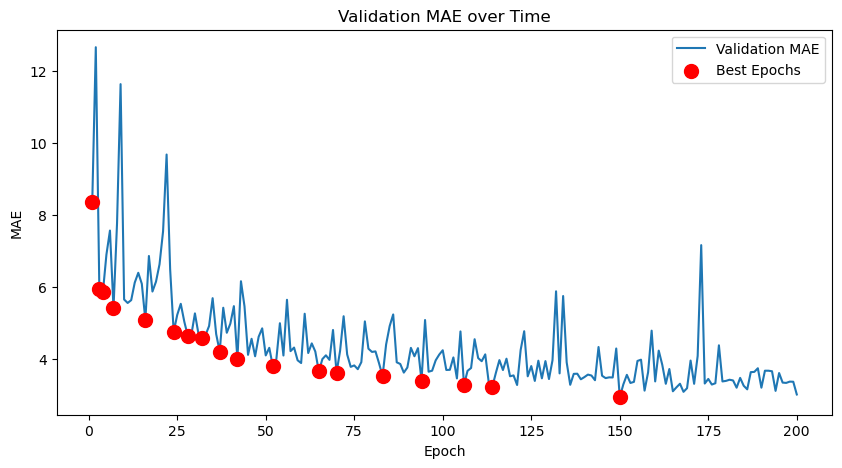

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca CSV
df = pd.read_csv('checkpoints/efficient_unfreeze_pre_norm.csv')

df['Validation MAE'] = df['Validation MAE'] / 8

best_train = df.nsmallest(5, 'Train MAE')[['Epoch', 'Train MAE']]
best_val = df.nsmallest(5, 'Validation MAE')[['Epoch', 'Validation MAE']]


# Print tabel
print("\n5 Best MAE:")
print("=" * 50)
print("Train MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_train.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Train MAE']:<15.4f}")

print("\nValidation MAE:")
print(f"{'Epoch':<10}{'MAE':<15}")
print("-" * 25)
for _, row in best_val.iterrows():
    print(f"{int(row['Epoch']):<10}{row['Validation MAE']:<15.4f}")
print("=" * 50)

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Training Loss'], label='Training Loss')
plt.plot(df['Epoch'], df['Validation Loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Progress')
plt.show()

# Plot MAE dengan best points
plt.figure(figsize=(10, 5))
plt.plot(df['Epoch'], df['Validation MAE'], label='Validation MAE')

# Tambahkan titik merah untuk Best Epochs
best_epochs = df[df['Best Epoch'] == 'Yes']
plt.scatter(best_epochs['Epoch'], best_epochs['Validation MAE'], 
           color='red', s=100, label='Best Epochs', zorder=5)

plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Validation MAE over Time')
plt.show()

In [5]:
!CUDA_VISIBLE_DEVICES=4,5,6,7 torchrun --nproc_per_node=4 --master_port=29501 module6/train.py --backbone_lr=1e-5 \
--model_name=efficient2_unfreeze_pre_norm --pre_norm


W0225 12:10:17.754000 1293605 site-packages/torch/distributed/run.py:793] 
W0225 12:10:17.754000 1293605 site-packages/torch/distributed/run.py:793] *****************************************
W0225 12:10:17.754000 1293605 site-packages/torch/distributed/run.py:793] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W0225 12:10:17.754000 1293605 site-packages/torch/distributed/run.py:793] *****************************************
0
3
2
1
[rank0]: Traceback (most recent call last):
[rank0]:   File "/home/renaldy_fredyan/PhDResearch/ELS/module6/train.py", line 242, in <module>
[rank0]:     train(args)
[rank0]:   File "/home/renaldy_fredyan/PhDResearch/ELS/module6/train.py", line 126, in train
[rank0]:     out, aux_out = model(img, bboxes)
[rank0]:   File "/opt/miniconda/envs/Rey2/lib/python3.10/site-packages/torch/nn/modules/module.p

In [6]:
!CUDA_VISIBLE_DEVICES=7 torchrun --nproc_per_node=1 --master_port=29501 module6/evaluate.py --backbone_lr=1e-5 \
--model_name=efficient2_unfreeze_pre_norm --pre_norm


[rank0]: Traceback (most recent call last):
[rank0]:   File "/home/renaldy_fredyan/PhDResearch/ELS/module6/evaluate.py", line 91, in <module>
[rank0]:     evaluate(args)
[rank0]:   File "/opt/miniconda/envs/Rey2/lib/python3.10/site-packages/torch/utils/_contextlib.py", line 116, in decorate_context
[rank0]:     return func(*args, **kwargs)
[rank0]:   File "/home/renaldy_fredyan/PhDResearch/ELS/module6/evaluate.py", line 36, in evaluate
[rank0]:     state_dict = torch.load(os.path.join(args.model_path, f'{args.model_name}.pt'), weights_only=True)['model']
[rank0]:   File "/opt/miniconda/envs/Rey2/lib/python3.10/site-packages/torch/serialization.py", line 1319, in load
[rank0]:     with _open_file_like(f, "rb") as opened_file:
[rank0]:   File "/opt/miniconda/envs/Rey2/lib/python3.10/site-packages/torch/serialization.py", line 659, in _open_file_like
[rank0]:     return _open_file(name_or_buffer, mode)
[rank0]:   File "/opt/miniconda/envs/Rey2/lib/python3.10/site-packages/torch/serializat